<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_11_Notebook_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **API Cohere**
---



**Cohere** é uma empresa de IA especializada em fornecer soluções de PLN. Fundada em 2019 por ex-cientistas do Google, a empresa está sediada em Toronto, Canadá.

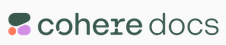

https://docs.cohere.com/

In [1]:
#@title Instalando a biblioteca da API Cohere
!pip install -q -U cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [3]:
#@title Versão da API Cohere

import cohere

print(cohere.__version__)

5.6.2


In [4]:
#@title Definindo a chave da API

from getpass import getpass

COHERE_API_KEY = getpass()

··········


In [12]:
#@title Teste

import cohere

cliente = cohere.Client(api_key = COHERE_API_KEY)

resposta = cliente.chat(
  model = "command-r-plus",
  message = "Qual a capital do Brasil?",
  temperature = 0.5
)

print(resposta.text)

A capital do Brasil é Brasília.


In [6]:
#@title Formatando a resposta [Markdown]

from IPython.display import Markdown

Markdown(resposta.text)

A capital do Brasil é Brasília.

In [7]:
#@title Formatando a resposta [JSON]

import json

import json

def formatar_json(resposta):
    dados = json.loads(resposta.json())
    json_formatado = json.dumps(dados, indent=4, ensure_ascii=False)
    linhas = json_formatado.splitlines()
    for linha in linhas:
      print(linha)

In [ ]:
formatar_json(resposta)

{
    "text": "A capital do Brasil é Brasília.",
    "generation_id": "4d65dbdd-7657-4c36-b325-bc6681669c58",
    "finish_reason": "COMPLETE",
    "chat_history": [
        {
            "message": "Qual a capital do Brasil?",
            "role": "USER"
        },
        {
            "message": "A capital do Brasil é Brasília.",
            "role": "CHATBOT"
        }
    ],
    "meta": {
        "api_version": {
            "version": "1"
        },
        "billed_units": {
            "input_tokens": 6,
            "output_tokens": 7
        },
        "tokens": {
            "input_tokens": 72,
            "output_tokens": 7
        }
    },
    "response_id": "f67be698-cace-4a82-8594-33af568cd9fa"
}


In [8]:
resposta.dict()

{'text': 'A capital do Brasil é Brasília.',
 'generation_id': 'ae1ac8f6-a662-4ce4-ad12-3ed3d829d143',
 'finish_reason': 'COMPLETE',
 'chat_history': [{'message': 'Qual a capital do Brasil?', 'role': 'USER'},
  {'message': 'A capital do Brasil é Brasília.', 'role': 'CHATBOT'}],
 'meta': {'api_version': {'version': '1'},
  'billed_units': {'input_tokens': 6, 'output_tokens': 7},
  'tokens': {'input_tokens': 72, 'output_tokens': 7}},
 'response_id': '51fff655-be88-40dd-8f63-ac8a0eaa0341'}

In [9]:
#@title Lista de Modelos

import cohere

cliente = cohere.Client(api_key = COHERE_API_KEY)

resposta = cliente.models.list()

resposta

ListModelsResponse(models=[GetModelResponse(name='embed-english-light-v2.0', endpoints=['embed', 'classify'], finetuned=False, context_length=512, tokenizer_url=None, default_endpoints=[]), GetModelResponse(name='embed-english-v2.0', endpoints=['embed', 'classify'], finetuned=False, context_length=512, tokenizer_url=None, default_endpoints=[]), GetModelResponse(name='command-r', endpoints=['generate', 'chat', 'summarize'], finetuned=False, context_length=128000, tokenizer_url='https://storage.googleapis.com/cohere-public/tokenizers/command-r.json', default_endpoints=[]), GetModelResponse(name='embed-multilingual-light-v3.0', endpoints=['embed', 'classify'], finetuned=False, context_length=512, tokenizer_url='https://storage.googleapis.com/cohere-public/tokenizers/embed-multilingual-light-v3.0.json', default_endpoints=[]), GetModelResponse(name='command-r-plus', endpoints=['generate', 'chat', 'summarize'], finetuned=False, context_length=128000, tokenizer_url='https://storage.googleapis

In [10]:
modelos = resposta.models

for modelo in modelos:
  print(modelo.name)

embed-english-light-v2.0
embed-english-v2.0
command-r
embed-multilingual-light-v3.0
command-r-plus
embed-multilingual-v3.0
embed-multilingual-v2.0
c4ai-aya-23-35b
command-light-nightly
c4ai-aya-23-8b
rerank-multilingual-v2.0
command-nightly
embed-english-v3.0
command
rerank-multilingual-v3.0
rerank-english-v2.0
command-light
rerank-english-v3.0
embed-english-light-v3.0


In [11]:
len(modelos)

19

**Conversas de Múltiplas Interações (*Multi-turn*)**

Imagine que você está desenvolvendo um chatbot projetado para responder às dúvidas dos usuários. Ter o contexto de conversas anteriores pode permitir que o modelo de linguagem forneça respostas mais relevantes.

Em conversas de múltiplas interações, reter o contexto das interações anteriores é essencial para gerar respostas coerentes e pertinentes. A API do **Cohere** facilita isso, permitindo-nos incluir o histórico do chat através do parâmetro `chat_history`.

In [14]:
resposta = cliente.chat(
  model = "command-r-plus",
  chat_history = [
    {"role": "USER", "text": "What is Large Language Model?"},
    {"role": "CHATBOT", "text": "Large Language Model is a type ..."},
  ],
  message="How is this related to Artificial Intelligence? Answer in Portuguese."
)

print(resposta.text)

Large Language Models (LLMs) estão intimamente relacionados com a inteligência artificial, pois representam um avanço significativo no campo da processamento de linguagem natural (PLN). A PNL é uma área fundamental da IA que se concentra na interação entre computadores e humanos em linguagem natural, como o inglês ou o português.

Os LLMs são modelos matemáticos sofisticados, geralmente baseados em redes neurais artificiais, que são treinados em grandes quantidades de dados de texto. Eles aprendem padrões, contextos e relacionamentos dentro da linguagem, imitando a maneira como os humanos entendem e geram linguagem.

A principal meta por trás do desenvolvimento de LLMs é capacitar máquinas com uma compreensão profunda da linguagem, permitindo-lhes realizar uma variedade de tarefas, como:

1. Processamento de Linguagem Natural (PNL): LLMs são usados para analisar e interpretar a linguagem humana, extraindo significados, sentimentos e intenções. Isso permite que os aplicativos de IA ente

In [15]:
from IPython.display import Markdown

Markdown(resposta.text)

Large Language Models (LLMs) estão intimamente relacionados com a inteligência artificial, pois representam um avanço significativo no campo da processamento de linguagem natural (PLN). A PNL é uma área fundamental da IA que se concentra na interação entre computadores e humanos em linguagem natural, como o inglês ou o português.

Os LLMs são modelos matemáticos sofisticados, geralmente baseados em redes neurais artificiais, que são treinados em grandes quantidades de dados de texto. Eles aprendem padrões, contextos e relacionamentos dentro da linguagem, imitando a maneira como os humanos entendem e geram linguagem.

A principal meta por trás do desenvolvimento de LLMs é capacitar máquinas com uma compreensão profunda da linguagem, permitindo-lhes realizar uma variedade de tarefas, como:

1. Processamento de Linguagem Natural (PNL): LLMs são usados para analisar e interpretar a linguagem humana, extraindo significados, sentimentos e intenções. Isso permite que os aplicativos de IA entendam consultas, comandos ou textos escritos pelos usuários e respondam de maneira apropriada.

2. Geração de Linguagem: Esses modelos podem gerar texto coerente e contextualmente apropriado, o que é útil para aplicações como geração de conteúdo, respostas automatizadas de chat bots ou até mesmo criação de histórias.

3. Compreensão de Linguagem: Os LLMs ajudam as máquinas a compreenderem a semântica e a sintaxe da linguagem, permitindo-lhes interpretar textos complexos, responder a perguntas e fornecer resumos ou explicações.

4. Tradução de Linguagem: Eles também podem ser aplicados em tarefas de tradução, facilitando a comunicação em diferentes idiomas.

5. Reconhecimento de Voz: Os LLMs contribuem para o reconhecimento de fala, permitindo que os dispositivos entendam comandos de voz e transcrevam a fala em texto escrito.

Em resumo, os Large Language Models são ferramentas poderosas que impulsionam o campo da inteligência artificial, melhorando a capacidade das máquinas de compreender, interpretar e gerar linguagem de maneira semelhante aos humanos. Este avanço tem o potencial de revolucionar inúmeras indústrias, desde atendimento ao cliente até processamento de linguagem natural, tornando as interações entre humanos e máquinas mais intuitivas e acessíveis.

Isso funciona muito bem, mas não é realista passar manualmente o `chat_history` para a API como fizemos no exemplo acima. Em vez de codificar o `chat_history` manualmente, podemos construí-lo dinamicamente à medida que a conversa acontece.

Existem várias maneiras de fazer isso. A mais simples é usar o `conversation_id` na API. Vamos ver um exemplo:

In [16]:
# primeira mensagem
resposta = cliente.chat(
  model="command-r-plus",
  message="What is Large Language Model?",
  conversation_id='newuser1',
)

print(resposta.text)

Large Language Models (LLMs) are a type of artificial intelligence (AI) system that has been trained on massive amounts of text data, typically in the range of billions or even trillions of words. They use deep learning techniques, particularly transformer architectures, to process and generate human-like language.

Here are some key characteristics and aspects of LLMs:

1. Training Data: LLMs are trained on large-scale text datasets that can include books, articles, websites, social media posts, and more. The training data is used to teach the model the patterns, structures, and nuances of human language.

2. Neural Network Architecture: LLMs typically use transformer-based neural network architectures, such as the Transformer model introduced by Vaswani et al. in 2017. Transformers excel at capturing long-range dependencies in text and can process input sequences in parallel, making them highly effective for language tasks.

3. Size and Parameters: LLMs are distinguished by their siz

E agora vamos enviar outra mensagem para o modelo — observe como o `conversation_id` é mantido consistente com a primeira mensagem. Enquanto o `conversation_id` for mantido consistente, a API usará automaticamente as mensagens anteriores como contexto.

In [17]:
# segunda mensagem
resposta = cliente.chat(
  model="command-r-plus",
  message="How is it related to Artificial Intelligence?",
  conversation_id='newuser1',
)
print(resposta.text)

Large Language Models (LLMs) are closely related to Artificial Intelligence (AI) and play a significant role in the field of AI. Here's how LLMs are connected to AI:

1. AI as a Field: Artificial Intelligence is a broad field of computer science that focuses on creating intelligent systems that can perform tasks and solve problems similarly to or better than humans. AI aims to mimic or exceed human cognitive functions, such as learning, reasoning, problem-solving, perception, understanding natural language, and making decisions.

2. Natural Language Processing (NLP): NLP is a subfield of AI that specifically deals with the interaction between computers and human language. It involves developing algorithms, models, and tools that enable machines to understand, interpret, and generate human language. LLMs are a product of advanced NLP techniques, as they are designed to process and generate human-like language.

3. Machine Learning (ML): Machine Learning is another crucial subfield of AI

**Referências**:

> https://docs.cohere.com/reference

> https://www.datacamp.com/tutorial/cohere-api-tutorial

